In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('news.csv', sep = ',')

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [5]:
df2 = pd.read_csv('WELFake_Dataset.csv', sep = ',')

In [6]:
sample_0 = df2[df2['label'] == 0 ][['title','text','label']].sample(n = 30000, random_state=42)
sample_1 = df2[df2['label'] == 1 ][['title','text','label']].sample(n = 30000, random_state=42)
sample_0['label'] = 'FAKE'
sample_1['label'] = 'REAL'
balanced_sample = pd.concat([sample_0,sample_1])
df = pd.concat([df[['title','text','label']], balanced_sample], ignore_index=True)

In [7]:
# balanced_sample.head()

In [8]:
df_news = df.copy()

In [9]:
df_news.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [10]:
df_news.drop(columns=['title'], inplace=True)

In [11]:
df_news.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


In [12]:
df_news.isnull().sum()

text     34
label     0
dtype: int64

In [13]:
df_news = df_news.dropna()

In [14]:
df_news.isnull().sum()

text     0
label    0
dtype: int64

In [15]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66301 entries, 0 to 66334
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    66301 non-null  object
 1   label   66301 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


# Cleaning Data Set

### Making All Words to Lower Case

In [16]:
df_news['text'] = df_news['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
##df_news['title'] = df_news['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))

### Removing Punctuations

In [17]:
df_news['text'] =  df_news['text'].str.replace('[^\w\s]','')
##df_news['title'] = df_news['title'].str.replace('[^\w\s]','')

C:\Users\ibrah\AppData\Local\Temp\ipykernel_43680\3675576982.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_news['text'] =  df_news['text'].str.replace('[^\w\s]','')


### Removing all numeric values

In [18]:
df_news['text'] = df_news['text'].str.replace('\d', '')
##df_news['title'] = df_news['title'].str.replace('\d', '')

C:\Users\ibrah\AppData\Local\Temp\ipykernel_43680\3602369770.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_news['text'] = df_news['text'].str.replace('\d', '')


### Removing stop words

In [19]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ibrah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
sw = stopwords.words('english')
df_news['text'] = df_news['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
##df_news['title'] = df_news['title'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

### Removing the words that are used only once in the text column and the title column

In [21]:
from collections import Counter
import re

def remove_single_occurrences_text(text):
    # Find the words and count them
    words_text = re.findall(r'\b\w+\b', text)
    word_counts_text = Counter(words_text)
    
   # Find the words that are used only once
    single_occurrences_text = {word for word, count in word_counts_text.items() if count == 1}
    
   # Remove the words that are used only once
    for word_text in single_occurrences_text:
        text = text.replace(f' {word_text} ', ' ')
    
    # remove  ' '
    return ' '.join(text.split())

## update
df_news['text'] = df_news['text'].apply(remove_single_occurrences_text)

In [22]:
df_news.head()

,text,label
0,daniel new york final stretch election hillary...,FAKE
1,google paul ryan president paul ryan president...,FAKE
2,us secretary state kerry said monday paris wee...,REAL
3,kaydee november democrats voters bernie novemb...,FAKE
4,primary new york frontrunners hillary clinton ...,REAL


In [23]:
# def remove_single_occurrences_title(title):
#     # Kelimeleri bul ve say
#     words_title = re.findall(r'\b\w+\b', title)
#     word_counts_title = Counter(words_title)
    
#     # Bir kez geçen kelimeleri bul
#     single_occurrences_title = {word for word, count in word_counts_title.items() if count == 1}
    
#     # Tek geçen kelimeleri başlıktan çıkar
#     for word_title in single_occurrences_title:
#         title = title.replace(f' {word_title} ', ' ')
    
#     # Boşlukları temizle
#     return ' '.join(title.split())

# # Yeni bir sütun oluştur ve kelimeleri çıkar
# df_news['title'] = df_news['title'].apply(remove_single_occurrences_title)

In [24]:
df_news.head()

,text,label
0,daniel new york final stretch election hillary...,FAKE
1,google paul ryan president paul ryan president...,FAKE
2,us secretary state kerry said monday paris wee...,REAL
3,kaydee november democrats voters bernie novemb...,FAKE
4,primary new york frontrunners hillary clinton ...,REAL


### Lemmatization

In [25]:
from textblob import Word
nltk.download('wordnet')
df_news['text'] = df_news['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 
##df_news['title'] = df_news['title'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ibrah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
df_news.head()

,text,label
0,daniel new york final stretch election hillary...,FAKE
1,google paul ryan president paul ryan president...,FAKE
2,u secretary state kerry said monday paris week...,REAL
3,kaydee november democrat voter bernie november...,FAKE
4,primary new york frontrunners hillary clinton ...,REAL


### Transforming Label Columns to 1 or 0

In [27]:
df_news['label'] = df_news['label'].replace({'FAKE':0, 'REAL':1})

In [28]:
df_news.head()

,text,label
0,daniel new york final stretch election hillary...,0
1,google paul ryan president paul ryan president...,0
2,u secretary state kerry said monday paris week...,1
3,kaydee november democrat voter bernie november...,0
4,primary new york frontrunners hillary clinton ...,1


### Removing Non-English words

In [29]:
import nltk
nltk.download('words')
from nltk.corpus import words

# İngilizce kelimeleri bir küme olarak al
english_words = set(words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ibrah\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [30]:
def remove_non_english_words(text):
    words_in_text = text.split()
    valid_words = [word for word in words_in_text if word.lower() in english_words]
    return ' '.join(valid_words)

df_news['text'] = df_news['text'].apply(remove_non_english_words)

### Removing 'u' characters from text

In [31]:
# "u" kelimesini kaldırma
df_news['text'] = df_news['text'].str.replace(r'\bu\b', '', regex=True)

# Temizlik sonrası boşlukları temizleme
df_news['text'] = df_news['text'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Sonucu kontrol etme
print(df_news['text'].head())

0    new york final stretch election gone war unpre...
1    president president cowardice trump trump tape...
2    secretary state kerry said week criticism offi...
3    democrat voter time democratic primary candida...
4    primary new york trump poll trump win delegate...
Name: text, dtype: object


### Removing empty rows

In [32]:
empty_texts = df_news[df_news['text'].str.strip() == '']

print(f"Empty Row numbers: {empty_texts.shape[0]}")

Empty Row numbers: 1108


In [33]:
# Boş metinleri içeren satırları çıkar
df_news = df_news[df_news['text'].str.strip().astype(bool)]

### Removing two characters words

In [34]:
# İki harfli kelimeleri temizle
df_news['text'] = df_news['text'].apply(lambda x: " ".join([word for word in x.split() if len(word) > 2]))

# Word Cloud

In [35]:
!pip install wordcloud

In [36]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [37]:
all_text = " ".join(i for i in df_news.text)

In [140]:
wordcloud = WordCloud(max_font_size = 60, 
                     background_color = "white").generate(all_text)
plt.figure(figsize = [10,10])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
##wordcloud.to_file('wordcloud_text.png')
plt.savefig('wordcloud_text.png', dpi=150, bbox_inches='tight')
plt.close()

In [39]:
## word cloud for title

In [40]:
##all_title = " ".join(x for x in df_news.title)

In [41]:
# wordcloud_title = WordCloud(max_font_size = 60, 
#                      background_color = "white").generate(all_title)
# plt.figure(figsize = [10,10])
# plt.imshow(wordcloud_title, interpolation = "bilinear")
# plt.axis("off")
# ##wordcloud.to_file('wordcloud_text.png')
# plt.savefig('wordcloud_title.png', dpi=150, bbox_inches='tight')
# plt.close()

In [139]:
def count_words(text):
    if isinstance(text, str):
        return len(text.split())
    return 0  # Eğer text None veya boşsa 0 döner

# Kelime sayısını hesaplayın
total_words = df_news['text'].apply(count_words).sum()

print(f"Total number of words in 'text' column: {total_words}")


Total number of words in 'text' column: 7674275


# Features Engineering

### Test-train

In [42]:
pip install scikit-learn xgboost lightgbm

Note: you may need to restart the kernel to use updated packages.


In [43]:
from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import pandas, xgboost, numpy, textblob, string
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras import layers, models, optimizers
import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [44]:
X_train, X_test, Y_train, Y_test =  model_selection.train_test_split(df_news['text'], df_news['label'], random_state=1)

### Count Vectors

In [45]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [46]:
x_train_count = vectorizer.transform(X_train)
x_test_count = vectorizer.transform(X_test)

In [47]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### TF-IDF

#### Word-level

In [84]:
tf_idf_word_vectorizer = TfidfVectorizer(stop_words='english')
tf_idf_word_vectorizer.fit(X_train)

TfidfVectorizer(stop_words='english')

In [85]:
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(X_train)
x_test_tf_idf_word  =  tf_idf_word_vectorizer.transform(X_test)

In [50]:
x_train_tf_idf_word.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
empty_texts = [text for text in X_train if not text.strip()]
print("Empty row number:", len(empty_texts))

Empty row number: 13


In [52]:
tf_idf_word_vectorizer.get_feature_names_out()[0:10]

array(['aam', 'aardvark', 'aba', 'abacus', 'abalone', 'abandon',
       'abandoned', 'abandonment', 'abatement', 'abatis'], dtype=object)

In [53]:
X_train.head()

13278    celebrated bar family warsaw celebrated bar wa...
56597    tweet black power front student worker south y...
43120    rep lawyer reed come press conference today co...
5090     director said investigator new bureau closed c...
31010    formally investigation formally investigation ...
Name: text, dtype: object

#### n-gram level

In [54]:
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2,3))
tf_idf_ngram_vectorizer.fit(X_train)

TfidfVectorizer(ngram_range=(2, 3))

In [55]:
x_train_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(X_train)
x_test_tf_idf_ngram  =  tf_idf_ngram_vectorizer.transform(X_test)

In [56]:
tf_idf_ngram_vectorizer.get_feature_names_out()[0:5]

array(['aam admi', 'aam admi party', 'aardvark four',
       'aardvark four meerkat', 'aardvark likely'], dtype=object)

#### characters level

In [57]:
thf_idf_chars_vectorizer = TfidfVectorizer(analyzer = "char", ngram_range = (2,3))
thf_idf_chars_vectorizer.fit(X_train)

TfidfVectorizer(analyzer='char', ngram_range=(2, 3))

In [58]:
x_train_tf_idf_chars = thf_idf_chars_vectorizer.transform(X_train)
x_test_tf_idf_chars = thf_idf_chars_vectorizer.transform(X_test)

# ML Models

### Logistic Regresyon

In [59]:
loj = linear_model.LogisticRegression(max_iter = 1600)
loj_model = loj.fit(x_train_count, Y_train)
accuracy = model_selection.cross_val_score(loj_model, x_test_count, Y_test, cv = 10).mean()

print("Count Vectors-Accuracy: ", accuracy)


# from sklearn import linear_model, model_selection
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
# from sklearn.pipeline import make_pipeline

# # Verileri ölçeklendir
# scaler = MaxAbsScaler()

# # Logistic Regression modelini oluştur
# loj = linear_model.LogisticRegression(max_iter=200)

# # Ölçekleme ve model eğitimi için pipeline kullan
# pipeline = make_pipeline(scaler, loj)

# # Modeli eğit
# pipeline.fit(x_train_count, Y_train)

# # Cross-validation
# cross_val_accuracy = model_selection.cross_val_score(pipeline, x_train_count, Y_train, cv=10).mean()

# # Sonuçları yazdır
# print("Count Vectors Cross-Validation Accuracy: ", cross_val_accuracy)


Count Vectors-Accuracy:  0.7251363891431002


In [86]:
loj = linear_model.LogisticRegression(max_iter = 1500)
loj_model = loj.fit(x_train_tf_idf_word, Y_train)
accuracy = model_selection.cross_val_score(loj_model, x_test_tf_idf_word, Y_test, cv = 10).mean()

print("Word Level TF-IDF-Accuracy: ", accuracy)

Word Level TF-IDF-Accuracy:  0.774709238608503


In [61]:
loj = linear_model.LogisticRegression(max_iter = 1500)
loj_model = loj.fit(x_train_tf_idf_ngram, Y_train)
accuracy = model_selection.cross_val_score(loj_model, x_test_tf_idf_ngram, Y_test, cv = 10).mean()

print("N-Gram TF-IDF-Accuracy: ", accuracy)

N-Gram TF-IDF-Accuracy:  0.7528678062871196


In [62]:
loj = linear_model.LogisticRegression(max_iter = 500)
loj_model = loj.fit(x_train_tf_idf_chars, Y_train)
accuracy = model_selection.cross_val_score(loj_model, x_test_tf_idf_chars, Y_test, cv = 10).mean()

print("Char Level TF-IDF-Accuracy: ", accuracy)

Char Level TF-IDF-Accuracy:  0.7647707766065222


### Naive Bayes

In [63]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_count,Y_train)
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_count, 
                                           Y_test, 
                                           cv = 10).mean()

print("Count Vectors Accuracy:", accuracy)

In [64]:
nb_model = nb.fit(x_train_tf_idf_word,Y_train)
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_tf_idf_word, 
                                           Y_test, 
                                           cv = 10).mean()

print("Word-Level TF-IDF Accuracy:", accuracy)

In [65]:
nb_model = nb.fit(x_train_tf_idf_ngram, Y_train)
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_tf_idf_ngram, 
                                           Y_test, 
                                           cv = 10).mean()

print("N-GRAM TF-IDF Accuracy:", accuracy)

In [66]:
nb_model = nb.fit(x_train_tf_idf_chars,Y_train)
accuracy = model_selection.cross_val_score(nb_model, 
                                           x_test_tf_idf_chars, 
                                           Y_test, 
                                           cv = 10).mean()

print("CHARLEVEL TF-IDF Accuracy:", accuracy)

### Random Forests

In [67]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_count, Y_train)
accuracy = model_selection.cross_val_score(rf_model, 
                                           x_test_count, 
                                           Y_test, 
                                           cv = 10).mean()

print("Count Vectors Accuracy:", accuracy)

In [68]:
rf_model = rf.fit(x_train_tf_idf_word, Y_train)
accuracy = model_selection.cross_val_score(rf_model, x_test_count, Y_test, cv = 10).mean()
print('Word Level TF-IDF-Accuracy: ', accuracy)

In [69]:
rf_model = rf.fit(x_train_tf_idf_ngram, Y_train)
accuracy = model_selection.cross_val_score(rf_model, x_test_tf_idf_ngram, Y_test, cv = 10).mean()
print('N-Gram TF-IDF-Accuracy: ', accuracy)

In [70]:
rf_model = rf.fit(x_train_tf_idf_chars, Y_train)
accuracy = model_selection.cross_val_score(rf_model, x_test_tf_idf_chars, Y_test, cv = 10).mean()
print('Character TF-IDF-Accuracy: ', accuracy)

### XGBoost

In [71]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(x_train_count, Y_train)
accuracy = model_selection.cross_val_score(xgb_model, 
                                           x_test_count, 
                                           Y_test, 
                                           cv = 10).mean()

print("Count Vectors Accuracy:", accuracy)

In [72]:
xgb_model = xgb.fit(x_train_tf_idf_word, Y_train)
accuracy = model_selection.cross_val_score(xgb_model, 
                                           x_test_tf_idf_word, 
                                           Y_test, 
                                           cv = 10).mean()

print("Word-Level TF-IDF Accuracy:", accuracy)

In [73]:
xgb_model = xgb.fit(x_train_tf_idf_ngram, Y_train)
accuracy = model_selection.cross_val_score(xgb_model, 
                                           x_test_tf_idf_ngram, 
                                           Y_test, 
                                           cv = 10).mean()

print("N-Gram TF-IDF Accuracy:", accuracy)

In [74]:
xgb_model = xgb.fit(x_train_tf_idf_chars, Y_train)
accuracy = model_selection.cross_val_score(xgb_model, 
                                           x_test_tf_idf_chars, 
                                           Y_test, 
                                           cv = 10).mean()

print("Character TF-IDF Accuracy:", accuracy)

### LightGBM

In [75]:
import numpy as np

In [76]:
Y_test_light = Y_test.astype(np.float32)
Y_train_light = Y_train.astype(np.float32) 

x_train_count_light = x_train_count.astype(np.float32)
# Eğer Y_train da uygun türde değilse bunu da kontrol edin
x_test_count_light = x_test_count.astype(np.float32)


x_test_tf_idf_word_light = x_test_tf_idf_word.astype(np.float32)
x_train_tf_idf_word_light = x_train_tf_idf_word.astype(np.float32)

x_test_tf_idf_ngram_light = x_test_tf_idf_ngram.astype(np.float32)
x_train_tf_idf_ngram_light = x_train_tf_idf_ngram.astype(np.float32)

x_test_tf_idf_char_light = x_test_tf_idf_chars.astype(np.float32)
x_train_tf_idf_char_light = x_train_tf_idf_chars.astype(np.float32)


In [77]:
lgbm = lgb.LGBMClassifier()
lgb_model = lgbm.fit(x_train_count_light,Y_train)
accuarcy = model_selection.cross_val_score(lgb_model, x_test_count_light, Y_test, cv=10).mean()
print("Count Vector Accuracy",  accuarcy)

In [78]:
lgb_model = lgbm.fit(x_train_tf_idf_word_light, Y_train_light)
accuarcy = model_selection.cross_val_score(lgb_model, x_test_tf_idf_word_light, Y_test_light, cv=10).mean()
print("TF IDF Word Accuracy",  accuarcy)

In [79]:
lgb_model = lgbm.fit(x_train_tf_idf_ngram_light, Y_train_light)
accuarcy = model_selection.cross_val_score(lgb_model, x_test_tf_idf_ngram_light, Y_test_light, cv=10).mean()
print("TF IDF - Ngram Accuracy",  accuarcy)

In [80]:
lgb_model = lgbm.fit(x_train_tf_idf_char_light, Y_train_light)
accuarcy = model_selection.cross_val_score(lgb_model, x_test_tf_idf_char_light, Y_test_light, cv=10).mean()
print("TF IDF - Character Accuracy",  accuarcy)

# Prediction

In [81]:
#### Logistic Regresyon TF-IDF Word Level en yuksek orana sahip cikti

In [87]:
new_text = ['Kamala Harris has released her medical records which concluded she is in excellent health and fit for the presidency Following the disclosure the Democratic Partys nominee to be the next US president accused Donald Trump of a lack of transparency over not releasing his own health records']

In [88]:
text_transform = tf_idf_word_vectorizer.transform(new_text)
loj_model.predict(text_transform)

array([0], dtype=int64)

In [89]:
new_text2 = ['The Claim: CDC reported that the majority of those infected with COVID-19 ‘always’ wore masks.']

In [90]:
text_predict2 = tf_idf_word_vectorizer.transform(new_text2)
loj_model.predict(text_predict2)

array([1], dtype=int64)

In [91]:
f1 = ["In a groundbreaking new study published by the Institute of Chocolate Research, scientists claim they have discovered that chocolate can cure all known diseases. The researchers, who conducted a year-long experiment, say that consuming chocolate daily can eliminate conditions ranging from the common cold to chronic illnesses. This revolutionary finding has sparked debates among health experts, some of whom are calling for chocolate to be classified as a superfood."]
f2 = ["Witnesses in New York City were left stunned after spotting what appeared to be a giant squid swimming in the waters of Central Park's pond. Eyewitnesses claim the creature was nearly 30 feet long and had vibrant, colorful tentacles. As the news spread, marine biologists rushed to the scene, speculating that this might be an unprecedented case of oceanic wildlife migrating inland. Local authorities have urged residents to remain calm while they investigate the mysterious appearance."]
f3 = ["A bizarre incident unfolded in downtown Chicago as authorities apprehended a group of individuals who claimed to be time travelers. The group was reportedly trying to sell rare artifacts from ancient Rome at a local flea market. When questioned, they insisted they had come from the year 3023 to preserve historical relics. Officials are now looking into the authenticity of their claims and whether time travel might be possible."]
f4 = ["NASA officials have announced an ambitious plan to build the first-ever water park on the Moon, following the discovery of large ice deposits in its polar regions. The water park, designed for astronauts and future tourists, will feature thrilling slides and a lazy river. Space enthusiasts are already buying tickets for the first lunar excursion, hoping to splash around in the low gravity environment."]
f5 = ["In an astounding revelation, a team of scientists at a leading university claims to have developed an invisible cloak using cutting-edge technology. The cloak, made from a unique material that bends light, can render objects completely invisible. This invention could revolutionize privacy and security, but experts warn of its potential misuse. The team is seeking government funding to further develop the technology for practical applications."]
f6 = ["In a promotional stunt that has left the world amazed, a pizza chain has successfully delivered the world's largest pizza to a research station in Antarctica. Measuring over 100 feet in diameter, the pizza was made with specially sourced ingredients to withstand extreme temperatures. Scientists stationed at the base celebrated the delivery, claiming it would be a great morale booster during the long, harsh winter months."]
f7 = ["A controversial study conducted by a fringe research group suggests that domestic cats are not merely pets but secret agents sent by extraterrestrial beings to monitor human activity. According to the report, cats exhibit behaviors that align with espionage techniques, such as stalking and observing. While mainstream scientists have dismissed the study, it has gained a following among conspiracy theorists who believe in the possibility of feline extraterrestrial connections."]
f8 = ["Adventurous hikers claim to have spotted a herd of unicorns in the remote regions of the Himalayas. According to reports, the majestic creatures were seen grazing near a mountain peak, captivating onlookers. The news has drawn the attention of both scientists and enthusiasts eager to explore the legend of unicorns. Researchers are now planning expeditions to investigate the sightings and capture evidence of these mythical beings."]
f9 = ["In a surprising legislative move, a new law has been passed in a small town requiring all residents to own at least one pet rock. City officials argue that this initiative is aimed at promoting responsibility and connection with nature. Citizens must register their pet rocks with the local government and provide monthly updates on their well-being. Critics of the law have raised concerns about the absurdity of such a requirement."]
f10 = ["In a stunning announcement, scientists have claimed to have achieved a breakthrough in teleportation technology. During a recent experiment, a peanut was successfully teleported across a laboratory space, marking a significant milestone in the field of physics. While researchers admit that human teleportation is still far from realization, they believe this experiment paves the way for future advancements in transportation and communications."]

In [92]:
all_f_news = f1 +f2 +f3 +f4 +f5 +f6 +f7 +f8 +f9 +f10

In [93]:
text_predict_all_f = tf_idf_word_vectorizer.transform(all_f_news)
loj_model.predict(text_predict_all_f)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [94]:
r1 = ["NASA has successfully completed the Artemis I mission, marking a significant milestone in its efforts to return humans to the Moon by 2024. The uncrewed Orion spacecraft launched from the Kennedy Space Center in Florida and traveled approximately 1.4 million miles over a period of 25 days. During its journey, Orion orbited the Moon before returning to Earth, splashing down in the Pacific Ocean. The mission aimed to test critical systems and gather data to ensure the safety of future crewed missions. NASA officials hailed the success of Artemis I as a major step forward for the Artemis program, which seeks to establish a sustainable human presence on the Moon and eventually send astronauts to Mars. The next mission, Artemis II, is planned to carry astronauts around the Moon, setting the stage for a return to lunar exploration."]
r2 = ["The World Health Organization (WHO) has declared an end to the COVID-19 global health emergency, signaling a significant turning point in the fight against the pandemic. WHO officials noted that vaccination efforts, increased immunity in populations, and effective treatments have contributed to the decline in severe cases and hospitalizations. The organization emphasizes the need for continued vigilance and preparedness for potential future outbreaks, while also encouraging countries to maintain robust healthcare systems."]
r3 = ["In an exciting development for renewable energy, a recent report reveals that solar power capacity has increased significantly worldwide. According to the International Energy Agency, global solar power generation grew by over 25% last year, driven by technological advancements and declining costs. This surge in solar energy adoption is seen as a crucial step toward achieving global climate goals and reducing dependency on fossil fuels."]
r4 = ["The United Nations has announced a new initiative to address global food insecurity, aiming to support millions affected by hunger and malnutrition. The initiative will focus on providing financial assistance, improving agricultural practices, and enhancing supply chains to ensure that vulnerable populations have access to nutritious food. UN officials stress the importance of global cooperation in tackling this pressing issue."]
r5 = ["In a historic decision, the U.S. Supreme Court has ruled to uphold the Affordable Care Act, ensuring that millions of Americans retain access to affordable healthcare. The decision comes after a lengthy legal battle and highlights the ongoing debate surrounding healthcare reform in the country. Advocates for the ACA celebrate this ruling as a victory for public health and access to essential medical services."]
r6 = ["A groundbreaking study has shown that early childhood education significantly impacts long-term academic success. Researchers found that children who participated in quality preschool programs were more likely to excel in school and have better social skills compared to their peers who did not have access to early education. This study has renewed calls for increased investment in early childhood education programs."]
r7 = ["In a recent announcement, the European Union revealed its plans to cut carbon emissions by at least 55% by 2030, as part of its commitment to the Paris Agreement. The plan includes a comprehensive approach to promoting green technologies, improving energy efficiency, and investing in renewable energy sources. EU leaders emphasize the importance of collaboration among member states to achieve these ambitious targets."]
r8 = ["The tech industry is abuzz with excitement following the release of a new smartphone that features groundbreaking technology, including advanced artificial intelligence capabilities and improved camera systems. Analysts predict that this device will set new standards for performance and innovation in the market. Consumers eagerly await the launch, which is expected to drive significant sales and boost the company's market share."]
r9 = ["A recent survey indicates that public support for climate action is at an all-time high, with a majority of citizens across the globe advocating for stronger policies to combat climate change. The survey highlights increasing awareness of the impacts of climate change and a desire for governments to take decisive action to protect the environment for future generations. This growing sentiment may influence policymakers in upcoming legislative sessions."]
r10 = ["Researchers have unveiled a new vaccine that shows promise in preventing certain types of cancer. In early trials, the vaccine demonstrated a strong immune response, suggesting it could provide a significant breakthrough in cancer treatment. Scientists are optimistic about the potential for this vaccine to improve patient outcomes and reduce cancer incidence in the long term. Further studies are planned to assess its efficacy and safety in larger populations."]

In [95]:
all_r_news = r1 +r2 +r3 +r4 +r5 +r6 +r7 +r8 +r9 +r10

In [96]:
text_predict_all_r = tf_idf_word_vectorizer.transform(all_r_news)
loj_model.predict(text_predict_all_r)

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [97]:
n_r1 = ["In the highly anticipated 2020 presidential election, Joe Biden, the Democratic candidate, defeated the incumbent President Donald Trump. The campaign was characterized by an intense focus on critical issues such as healthcare, climate change, and economic recovery, especially in light of the COVID-19 pandemic that had significantly impacted the nation. Biden’s government aims to implement policies that foster unity and promote healing in a divided country. Many believe his approach will redefine the political landscape and restore faith in government institutions."]
n_r2 = ["Former President Barack Obama recently delivered a powerful speech about the importance of voter turnout, urging citizens to engage actively in the democratic process. During an event in a swing state, he emphasized that the future of the country hinges on individual participation in elections. Obama highlighted that young voters, in particular, have the power to influence the outcome of the election by making their voices heard. He stressed the significance of every vote and how it can shape the policies of the next government, especially concerning issues like education and climate action."]
n_r3 = ["As the 2024 election cycle begins to heat up, potential candidates are gearing up for their campaigns, focusing on vital issues that affect the everyday lives of citizens. Discussions surrounding policies related to education reform, healthcare accessibility, and economic stability have become central themes in early debates. The government is bracing itself to tackle the pressing challenges that have emerged in recent years, including the economic fallout from the pandemic. Political analysts predict that these issues will play a significant role in determining the next president."]
n_r4 = ["In a recent address to the nation, President Biden urged Americans to come together as one, emphasizing the importance of collaboration in facing ongoing challenges. He stated that unity is crucial for the country to progress and that every citizen has a vital role in shaping the nation’s future. Biden’s message resonated with many, especially as the country navigates through various social and economic hurdles. The President's call for cooperation comes at a time when political polarization is at an all-time high, with many citizens longing for a return to bipartisanship."]
n_r5 = ["The debate surrounding climate change continues to dominate political discussions as the 2024 election approaches. Candidates in the upcoming election are actively presenting their plans to address climate issues and promote sustainable practices. Many believe that the outcome of the election will significantly impact government policies in the coming years, especially as climate scientists warn of increasingly dire consequences if decisive action is not taken. Voters are paying close attention to candidates' environmental platforms, indicating a shift in priorities towards sustainability and responsibility."]
## f news
n_f1 = ["In a shocking twist, a recent poll suggests that President Trump plans to run for a second term from a mysterious island country known only to a select few. Sources claim that he has been secretly campaigning while on vacation, gaining support from extraterrestrial beings who promise to vote for him in the 2024 election. This unexpected alliance has raised eyebrows, with skeptics questioning the feasibility of such claims. Nevertheless, Trump's supporters have rallied behind this narrative, claiming it proves his unmatched popularity."]
n_f2 = ["Reports have emerged that a new candidate for the presidency has been chosen by a secret society known as the 'Government of Shadows.' This candidate, rumored to possess supernatural abilities, is expected to revolutionize the political landscape and reshape the future of the state. Conspiracy theorists are buzzing about this hidden group’s influence on major political decisions and their plans to unveil this candidate during a rare lunar eclipse, marking a new era in American politics."]
n_f3 = ["Former President Obama has reportedly joined forces with a coalition of animals to lead a campaign against climate change. This unique alliance is said to include talking squirrels and wise owls, who will share their insights on environmental policies with the people. Environmental activists have praised this unprecedented move, claiming it highlights the urgency of the climate crisis. Critics, however, are questioning the legitimacy of an animal-led initiative and whether it can effectively impact government policies."]
n_f4 = ["A bizarre new conspiracy theory claims that the government has been using time travel technology to manipulate past elections. This theory suggests that candidates like Trump and Obama were part of a larger plan orchestrated by a clandestine organization to control the timeline of American politics. Enthusiasts of this theory believe that revelations about time travel will soon emerge, potentially reshaping the political narrative as we know it and challenging the very foundation of democracy."]
n_f5 = ["In a recent scandal, it was revealed that a candidate for the upcoming election has been using a magic crystal ball to predict the outcome of political events. This revelation has raised questions about the legitimacy of their campaign and whether they can genuinely represent the interests of the people. Critics have called for transparency and accountability, while the candidate's supporters argue that their unique approach could bring a fresh perspective to political discourse. The controversy continues to unfold as the election draws nearer."]

In [98]:
mixed_text = n_r1 + n_r2 + n_r3 + n_r4 + n_r5 + n_f1 + n_f2 + n_f3 + n_f4 + n_f5

In [99]:
mixed_text_transform = tf_idf_word_vectorizer.transform(mixed_text)
loj_model.predict(mixed_text_transform)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [115]:
test_news_f = ["The U.S. Congress has passed a historic $1.2 trillion infrastructure bill aimed at upgrading the country’s aging roads, bridges, and broadband networks. The bill, which has been a major priority for President Joe Biden's administration, passed with bipartisan support after months of negotiation between Democrats and Republicans. President Biden hailed the bill as a once-in-a-generation investment in America’s infrastructure, promising that it would create millions of jobs, modernize transportation systems, and improve internet access across the country. The bill also includes funding for clean energy projects and efforts to address climate change. Experts say this legislation will have a long-lasting impact on the U.S. economy and help the country remain competitive in the global market."]
test_news_r = ["In a surprising turn of events, the Biden administration's highly anticipated $1.2 trillion infrastructure bill has been rejected by Congress, leaving many wondering about the future of the U.S. economy. Despite months of negotiations and promises of bipartisan support, key Democratic and Republican lawmakers ultimately opposed the bill, citing concerns over the national debt and mismanagement of funds. Critics argue that the bill lacked clarity and failed to address urgent infrastructure needs. The failure to pass the bill is seen as a major blow to President Biden's administration, raising questions about his ability to unite Congress and move forward with his ambitious domestic agenda."]
f_r = test_news_f + test_news_r

In [116]:
test_text_t = tf_idf_word_vectorizer.transform(f_r)
loj_model.predict(test_text_t)

array([0, 1], dtype=int64)

In [136]:
tt = ["In a groundbreaking study published today, a team of scientists from the International Institute of Cheese Studies claims to have discovered that the Moon is primarily made of cheese. The researchers conducted extensive experiments using a new type of cheese analyzer and concluded that the Moon's surface is composed of Swiss cheese. They believe this finding could change the way we understand lunar geology and may even lead to new culinary explorations in space cuisine. The lead scientist stated, We always knew the Moon had a rich flavor, but we never expected it to be made of cheese! This discovery has sparked excitement among food enthusiasts and astronomers alike."]
tt2 = ["In a historic move, the United States Congress has passed a comprehensive bill aimed at addressing climate change and reducing carbon emissions. The legislation, known as the Climate Action Act, includes provisions for renewable energy investments, increased fuel efficiency standards for vehicles, and measures to protect vulnerable communities from the impacts of climate change. The bill, which received bipartisan support, is seen as a significant step toward meeting the nation's climate goals and fulfilling commitments made under international agreements. Environmental advocates hailed the passage of the bill as a crucial victory in the fight against climate change."]
tt3 = ["NASA has announced that its Perseverance rover has detected organic molecules on the surface of Mars. Scientists believe these molecules could provide important clues about the possibility of ancient life on the Red Planet. NASA stated that this discovery is critical for the ongoing search for past life on Mars. So far, the rover has detected compounds that have never been encountered before, causing excitement in the scientific community."]
tt4 = ["In a groundbreaking discovery, scientists have confirmed that the Moon is actually made of cheese. The study, conducted by a team of experts from the Institute of Lunar Research, reveals that the surface and core of the Moon consist of different types of cheese, including cheddar and mozzarella. This finding has surprised the scientific community and is expected to change our understanding of the universe. The researchers are now planning a mission to harvest the cheese for commercial use on Earth."]
tt5 = ["In an unprecedented move, world leaders have come together in a secret summit to sign an agreement that will eliminate all national borders by the year 2025. The agreement, dubbed the Global Unity Pact, was reportedly signed by the presidents and prime ministers of over 150 countries. According to leaked documents, the plan aims to create a single global government and remove all immigration restrictions, allowing free movement of people and goods across the world. Critics argue that this will lead to the collapse of national sovereignty, while supporters claim it will promote world peace and unity."]
tt6 = ["In a shocking announcement, the U.S. government has revealed plans to completely replace the U.S. dollar with a new digital currency by the end of next month. The new currency, reportedly called FedCoin,will be fully controlled by the Federal Reserve and eliminate the need for physical cash. Government officials claim this move is necessary to combat financial crimes and improve economic efficiency, but critics warn that it will allow the government to monitor all personal transactions and undermine financial privacy. Some conspiracy theories have even suggested that this is part of a larger plan to control the population through digital tracking."]


In [119]:
tt_transform = tf_idf_word_vectorizer.transform(tt)
loj_model.predict(tt_transform)

array([0], dtype=int64)

In [125]:
tt2_transform = tf_idf_word_vectorizer.transform(tt2)
loj_model.predict(tt2_transform)

array([1], dtype=int64)

In [128]:
tt3_transform = tf_idf_word_vectorizer.transform(tt3)
loj_model.predict(tt3_transform)

array([1], dtype=int64)

In [131]:
tt4_transform = tf_idf_word_vectorizer.transform(tt4)
loj_model.predict(tt4_transform)

array([1], dtype=int64)

In [134]:
tt5_transform = tf_idf_word_vectorizer.transform(tt5)
loj_model.predict(tt5_transform)

array([1], dtype=int64)

In [137]:
tt6_transform = tf_idf_word_vectorizer.transform(tt6)
loj_model.predict(tt6_transform)

array([1], dtype=int64)

# Evaluation

### Confusion Matrix

In [102]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [103]:
data = confusion_matrix(Y_test, y_pred=loj_model.predict(x_test_tf_idf_word))

In [104]:
df_cm = pd.DataFrame(data, columns= np.unique(Y_test), index = np.unique(Y_test))

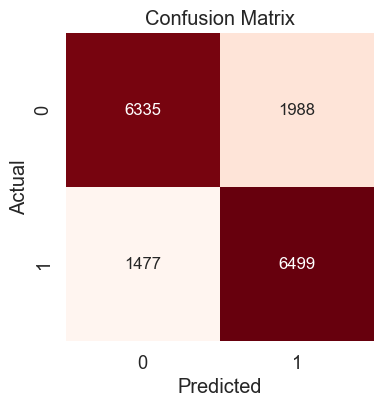

In [143]:
df_cm.index.name = "Actual"
df_cm.columns.name = "Predicted"
plt.figure(figsize=(4,4))
sns.set(font_scale = 1.2)
sns.heatmap(df_cm, annot=True, annot_kws={'size':12}, cbar=False,square=True, fmt = 'd', cmap = "Reds")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')  # saving as png


### Classification Report

In [106]:
from sklearn.metrics import classification_report

In [107]:
print(classification_report(Y_test, y_pred=loj_model.predict(x_test_tf_idf_word)))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79      8323
           1       0.77      0.81      0.79      7976

    accuracy                           0.79     16299
   macro avg       0.79      0.79      0.79     16299
weighted avg       0.79      0.79      0.79     16299



# WEB APPLICATION

In [138]:
## i load the model.joblib and vectorizer.joblib to create a web application
import joblib

In [112]:
## Saving models
joblib.dump(loj_model,'model.joblib')
joblib.dump(tf_idf_word_vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']